# NetTech Customer Segmentation Project, 2020 

### This project aims at grouping customers into segments with respect to product types, purchase history and whether or not they are foreigners to understand the response of customers to the companies product, their preferences, likes and dislikes.To achieve this, the company's customer data was explored and preprocessed for analysis. Thereafter, KMeans clustering, a Machine learning tool, was used to build the model for clustering.

Contents
1. Data Exploration
2. Data Pre-processing
3. Machine Learning
4. Visualizing with heat map
5. Observations and Recommendations

#### 1. Data Exploration

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv('data.csv', sep=",", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#check the length of the dataset
df.shape

(541909, 8)

In [4]:
#check the column with null values
df.apply(lambda x: sum(x.isna()), axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#Seperate the Customers with nan values
df_isnan = df[df.isna().any(axis=1)]
df_isnan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


Note: The unidentified customers(CustomerID with NaN) would be worked on later

In [6]:
#check country of customers with Id not identified
df_isnan['Country'].unique()

array(['United Kingdom', 'EIRE', 'Bahrain', 'Israel', 'Hong Kong',
       'Unspecified', 'France', 'Switzerland', 'Portugal'], dtype=object)

#### 2. Data Preprocessing

In [7]:
#drop the column with nan values
df_clean = df.dropna(axis=0, how='any')
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
#check the length of the data 
df_clean.shape

(406829, 8)

In [9]:
#check the length of unique customers
len(df_clean.CustomerID.unique())

4372

In [10]:
#check unique countries
df.Country.unique(), len(df.Country.unique())

(array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
        'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
        'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
        'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
        'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
        'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
        'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
        'European Community', 'Malta', 'RSA'], dtype=object), 38)

In [25]:
#drop the invoice number and the stockcode since they don't count much
df_clean.drop(['InvoiceNo', 'StockCode'], axis='columns').head()


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
#for better processing,description is striped of punctuations and turned to lower case
import re

def clean(description):
    return re.sub(r'[^\w\s]','',description).lower()
    
df_clean['Description'] = df_clean['Description'].apply(clean)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [12]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
#reset index to have a well ordered numbering and drop the former index
df_clean = df_clean.reset_index().drop('index', axis=1)
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
#check the length of Description
len(df_clean['Description'].unique())

3886

In [15]:
len(df_clean['CustomerID'].unique())

4372

In [16]:
#check the length of the working dataset
df_clean.shape

(406829, 8)

It is observed that some customers bought more than one product

The 'Description'(in the dataset), tells us about the type of products the customer bought. From the analysis above, it is found that a customer can buy more than one products. Hence, product 'Description' majorly determines the customers segmentation.
However,our goal is to understand the customers with respect to the product. In view of this, we cluster closely related product description into some buckets(i.e Product0,Product1,Product2...) with each Product as a feature(column) in the dataset to have a unique CustomerID with its respective product description details.

Vectorizing text data

The description of product column contains textual data. To use this in the model, it will be parsed to remove certain words not relevant. After this is done, the words are encoded as integers for use in the model. This process is called vectorization.

In [17]:
#it would be changed to digit via CountVectorizer so it is imported 
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
#instantiate the CountVectorizer class. 
#english is chosen for English words
vectorizer = CountVectorizer(stop_words='english')

In [19]:
#tokenize the text i.e remove irrelevant words
vectorizer.fit(df_clean.Description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
#check the size
len(vectorizer.vocabulary_)

2093

In [21]:
#change to integer
description = vectorizer.transform(df_clean.Description)
description

<406829x2093 sparse matrix of type '<class 'numpy.int64'>'
	with 1640936 stored elements in Compressed Sparse Row format>

In [22]:
description.shape

(406829, 2093)

In [21]:
description.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Cluster products and Create Features

In [23]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=5)

The desciptions of products is clustered into 5 product buckets for simplicity

In [24]:
#train the model
km.fit(description)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
#km.labels is used to get the label of cluster of each description
df_clean['Products'] = km.labels_
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Products
0,536365,85123A,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,4
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2


In [27]:
#last five data
df_clean.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Products
406824,581587,22613,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France,1
406825,581587,22899,childrens apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France,1
406826,581587,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France,1
406827,581587,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France,1
406828,581587,22138,baking set 9 piece retrospot,3,12/9/2011 12:50,4.95,12680.0,France,3


In [28]:
df_clean.Products.unique()

array([4, 1, 2, 3, 0], dtype=int64)

Create a unique customer table 

In [29]:
df_customer = pd.DataFrame({'CustomerID': df_clean['CustomerID'].unique()})
df_customer.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [30]:
#assign each customer to its respective product category
#for now we set them to zero to create them
df_customer['Product0'] = 0
df_customer['Product1'] = 0
df_customer['Product2'] = 0
df_customer['Product3'] = 0
df_customer['Product4'] = 0

df_customer.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,0,0,0,0,0
1,13047.0,0,0,0,0,0
2,12583.0,0,0,0,0,0
3,13748.0,0,0,0,0,0
4,15100.0,0,0,0,0,0


In [31]:
#create total column in the df_clean dataset
df_clean['Total'] = df_clean['UnitPrice'] * df_clean['Quantity']
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Products,Total
0,536365,85123A,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,4,15.30
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,22.00
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,20.34
4,536365,84029E,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2,20.34


'Total' stand for the total price of the each product

In [32]:
#to allocate the total sales to each products
from tqdm import tqdm

#to iterate through the df_clean(original data) dataset
for index in tqdm(range(len(df_clean))):
    #get all the customerID in the original data
    customerID = df_clean.loc[index, 'CustomerID']
    #get all the total price in the originaldata
    product_price = df_clean.loc[index, 'Total']
    #get all the cluster labels(products, 0-4) for each row in the original data 
    product_category = df_clean.loc[index,'Products']
    
    #get the match between the customer_ids of table df_customer and table df_clean
    customer_table_index = df_customer[df_customer['CustomerID'] == customerID].index[0]
    
    #iterate to get the total sum of of the total a particular CustomerID, its respective product label and group under 
    #the particular Product column 
    df_customer.loc[customer_table_index,'Product'+str(product_category)] += product_price

100%|██████████| 406829/406829 [43:43<00:00, 155.04it/s] 


In [40]:
#testing the results
#customer_table_index = df_customer[df_customer['CustomerID'] == customerID]
#customer_table_index
#df_customer.tail()

,CustomerID,Product0,Product1,Product2,Product3,Product4
3293,12680.0,0.0,710.96,64.5,87.35,0.0


In [43]:
#df_customer[df_customer['CustomerID']== 12680.0]

In [44]:
#check the df_customer table
df_customer.head(10)

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,0.00,3375.97,848.16,321.30,743.20
1,13047.0,0.00,2449.82,43.05,518.38,67.85
2,12583.0,84.70,4256.56,1472.74,1373.34,0.00
3,13748.0,0.00,896.17,0.00,52.08,0.00
4,15100.0,0.00,635.10,0.00,0.00,0.00
5,15291.0,0.00,3793.00,428.91,19.80,354.80
6,14688.0,1592.03,2522.18,467.89,525.28,0.00
7,17809.0,0.00,4235.40,53.10,339.12,0.00
8,15311.0,16275.48,28531.88,9949.32,2483.94,2178.72
9,14527.0,647.76,5472.35,1202.14,323.98,65.15


In [47]:
#confirming the results using group by method
df_clean[(df_clean['CustomerID']==17850.0) & (df_clean['Products']==1) ].groupby('CustomerID').sum()
#we can also use groupby and merge tables to get this

,Quantity,UnitPrice,Products,Total
CustomerID,,,,
17850.0,1121,832.08,207,3375.97


Create Purchase History

In [48]:
#five statistical summary features is created
#This is to indicate customer's purchase history
#This would be used to keep track of the purchase timing in lieu of date 
df_customer['PurchaseCount'] = 0
df_customer['PurchaseMin'] = 0
df_customer['PurchaseMax'] = 0
df_customer['PurchaseMean'] = 0
df_customer['PurchaseSum'] = 0

df_customer.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,0.0,3375.97,848.16,321.30,743.20,0,0,0,0,0
1,13047.0,0.0,2449.82,43.05,518.38,67.85,0,0,0,0,0
2,12583.0,84.7,4256.56,1472.74,1373.34,0.00,0,0,0,0,0
3,13748.0,0.0,896.17,0.00,52.08,0.00,0,0,0,0,0
4,15100.0,0.0,635.10,0.00,0.00,0.00,0,0,0,0,0


In [49]:
#input values into the product history columns

#iterate over the df_customer table for unique values
for index in tqdm(range(len(df_customer))):
    #store each customerID during iteration
    customerID = df_customer.loc[index,'CustomerID']
    
    #store each row where customer ID in tables df_customer and df_clean matches and take the total column
    record = df_clean[df_clean['CustomerID'] == customerID]['Total']
    
    #count the number of records for each customer and attach to the PurchaseCount column
    df_customer.loc[index,'PurchaseCount'] = record.count()
    
    #take the minimum records of each customer and attach to the PurchaseMin
    df_customer.loc[index,'PurchaseMin'] = record.min()
    
    #take the maximum records of each customer and attach to the PurchaseMax
    df_customer.loc[index,'PurchaseMax'] = record.max()
   
    #find the average of the total of each customer and attach to the PurchaseMean 
    df_customer.loc[index,'PurchaseMean'] = record.mean()
    
    #find the sum of the total of each customer and attach to the PurchaseSum
    df_customer.loc[index,'PurchaseSum'] = record.sum()

100%|██████████| 4372/4372 [01:38<00:00, 44.47it/s]


In [50]:
#check the Purchase history records
df_customer.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,0.0,3375.97,848.16,321.30,743.20,312,-30.60,107.25,16.950737,5288.63
1,13047.0,0.0,2449.82,43.05,518.38,67.85,196,-15.00,68.00,15.709694,3079.10
2,12583.0,84.7,4256.56,1472.74,1373.34,0.00,251,-60.84,132.80,28.634821,7187.34
3,13748.0,0.0,896.17,0.00,52.08,0.00,28,9.36,204.00,33.866071,948.25
4,15100.0,0.0,635.10,0.00,0.00,0.00,6,-131.40,350.40,105.850000,635.10


 Creating binary feature for foreign(0) and UK based(1) citizen

In [51]:
#assign a default value for non-indigeon
df_customer['UK_citizen'] = 0
df_customer.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,UK_citizen
0,17850.0,0.0,3375.97,848.16,321.30,743.20,312,-30.60,107.25,16.950737,5288.63,0
1,13047.0,0.0,2449.82,43.05,518.38,67.85,196,-15.00,68.00,15.709694,3079.10,0
2,12583.0,84.7,4256.56,1472.74,1373.34,0.00,251,-60.84,132.80,28.634821,7187.34,0
3,13748.0,0.0,896.17,0.00,52.08,0.00,28,9.36,204.00,33.866071,948.25,0
4,15100.0,0.0,635.10,0.00,0.00,0.00,6,-131.40,350.40,105.850000,635.10,0


In [59]:
#customerCountry = df_clean[df_clean['CustomerID'] == customerID].loc[1,'Country']
customerCountry = df_clean[df_clean['CustomerID'] == customerID].reset_index()
customerCountry.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Products,Total
0,406688,581578,POST,postage,3,12/9/2011 12:16,18.00,12713.0,Germany,1,54.0
1,406689,581578,21124,set10 blue polkadot party candles,24,12/9/2011 12:16,1.25,12713.0,Germany,1,30.0
2,406690,581578,21122,set10 pink polkadot party candles,24,12/9/2011 12:16,1.25,12713.0,Germany,1,30.0
3,406691,581578,21121,set10 red polkadot party candles,24,12/9/2011 12:16,1.25,12713.0,Germany,2,30.0
4,406692,581578,23389,spaceboy mini backpack,4,12/9/2011 12:16,4.15,12713.0,Germany,1,16.6


In [60]:
#iterate through to get the match for uk based indigeons in the df_clean table
for index in tqdm(range(len(df_customer))):
    #store each instances of the CustomerID in the df_customer table as customerID
    customerID = df_customer.loc[index, 'CustomerID']
    
    #get each row where the IDs in the two table matches
    #reset the index to reorder the number from zero and get each row in the country column 
    customerCountry = df_clean[df_clean['CustomerID'] == customerID].reset_index().loc[0,'Country']
    
    #find and set united kingdom citizen to 1
    if customerCountry == 'United Kingdom':
        df_customer.loc[index, 'UK_citizen'] = 1

100%|██████████| 4372/4372 [02:01<00:00, 45.63it/s] 


In [61]:
df_customer.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,UK_citizen
0,17850.0,0.0,3375.97,848.16,321.30,743.20,312,-30.60,107.25,16.950737,5288.63,1
1,13047.0,0.0,2449.82,43.05,518.38,67.85,196,-15.00,68.00,15.709694,3079.10,1
2,12583.0,84.7,4256.56,1472.74,1373.34,0.00,251,-60.84,132.80,28.634821,7187.34,0
3,13748.0,0.0,896.17,0.00,52.08,0.00,28,9.36,204.00,33.866071,948.25,1
4,15100.0,0.0,635.10,0.00,0.00,0.00,6,-131.40,350.40,105.850000,635.10,1


#### 3. Machine Learning

In [62]:
#the data need to be first scaled to be from -1 to +1
#this is done to make both the x and y scales even

from sklearn.preprocessing import StandardScaler

#instantiate
scaler = StandardScaler()

#initiate the scaling
df_scaled = scaler.fit_transform(df_customer)

In [63]:
#convert to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df_customer.columns)
df_scaled.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,UK_citizen
0,1.480857,-0.152539,0.381291,0.661491,0.113377,1.164749,0.941929,0.019410,-0.027050,-0.093381,0.412510,0.326857
1,-1.308028,-0.152539,0.213313,-0.154480,0.291646,-0.013522,0.442886,0.024834,-0.040674,-0.103129,0.143658,0.326857
2,-1.577452,-0.070619,0.541006,1.294496,1.065000,-0.131899,0.679501,0.008896,-0.018181,-0.001604,0.643541,-3.059443
3,-0.900989,-0.152539,-0.068476,-0.198111,-0.130145,-0.131899,-0.279865,0.033304,0.006533,0.039487,-0.115620,0.326857
4,-0.115944,-0.152539,-0.115826,-0.198111,-0.177254,-0.131899,-0.374511,-0.015637,0.057349,0.604912,-0.153723,0.326857


In [69]:
#find the best silhouette_score
#a high silhouette_score helps us to find a better defined cluster
from sklearn.metrics import silhouette_score

kmrng= range(2,9)
score = []
for index in kmrng:
    km = KMeans(n_clusters = index)
    clusters = km.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, clusters)
    score.append(sil_score)


Text(0, 0.5, 'Silhouette_score')

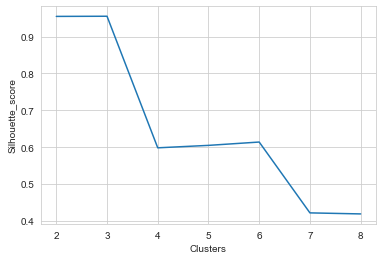

In [70]:
#plotting
sn.set_style('whitegrid')
sn.lineplot(x=kmrng, y=score, legend='full')

#usestyleas('ggplot')
plt.xlabel('Clusters')
plt.ylabel('Silhouette_score')

Clusters 2 and 3 have the highest silhouette_scores. 3 clusters is chosen so the dataset is clustered into 3

In [72]:
#intantite the model
km = KMeans(n_clusters=3)

#train the dataset
km.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
#check the center of the clusters
km.cluster_centers_

array([[ 2.56188209e-04, -1.12399782e-02, -2.98735885e-02,
        -2.55091953e-02, -2.96345001e-02, -2.22245551e-02,
        -1.00864293e-02,  2.03527112e-02, -2.11499378e-02,
        -2.32509353e-03, -3.00544685e-02,  2.50466157e-03],
       [-1.14259631e-02,  8.22605727e+00,  2.18049743e+01,
         1.86197250e+01,  2.16132446e+01,  1.62086260e+01,
         7.46533542e+00, -5.77754576e-01,  1.19314711e+00,
         1.76567791e+00,  2.19365583e+01, -1.93067615e+00],
       [-5.24724782e-01, -1.52539482e-01, -2.30752903e-01,
        -1.98110750e-01, -1.77254405e-01, -1.31898751e-01,
        -3.87417609e-01, -4.26763521e+01,  4.25697229e+01,
        -2.23679645e-01, -2.30824555e-01,  3.26856915e-01]])

The cluster centers above show the centers of each features(columns) of each cluster

In [121]:
#store all the Products Description according to the label in a distinct Products label table
Product0 = df_clean[df_clean['Products']==0]
Product1 = df_clean[df_clean['Products']==1]
Product2 = df_clean[df_clean['Products']==2]
Product3 = df_clean[df_clean['Products']==3]
Product4 = df_clean[df_clean['Products']==4]

In [122]:
#view each Product
#Product0['Products'].unique()

In [123]:
#merge the disctint Products label
product_merge1 = Product0.merge(Product1, how='inner', on='CustomerID')
df_merged1 = product_merge1[['Description_x','Description_y']].head()
.rename()

,Description_x,Description_y
0,charlotte bag dolly girl design,alarm clock bakelike pink
1,charlotte bag dolly girl design,alarm clock bakelike green
2,charlotte bag dolly girl design,panda and bunnies sticker sheet
3,charlotte bag dolly girl design,stars gift tape
4,charlotte bag dolly girl design,inflatable political globe


#### 4. Visualizing result with heat map

Text(0.5, 1.01, 'Heatmap of Product Features against Clusters')

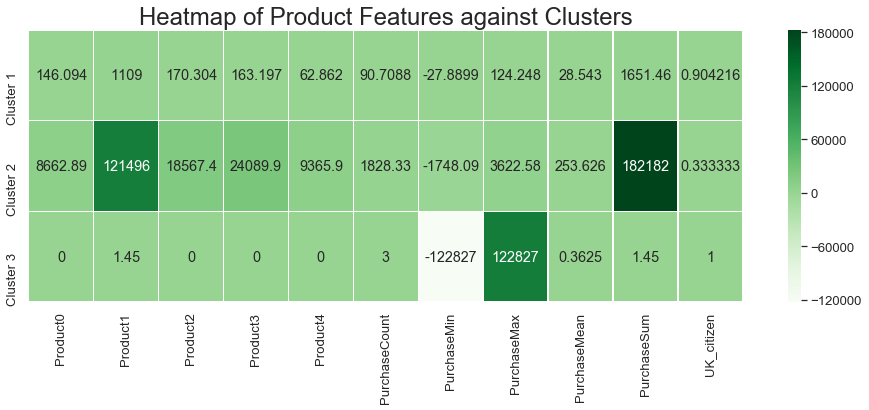

In [104]:
#to get back the actual value of df_scaled dataset before being scaled,scale.inverse_transform is used
#the CustomerID is dropped by indexing to catch the needed features

data = scaler.inverse_transform(km.cluster_centers_)[:,1:12]

#annot used to set the data value on 
plt.figure(figsize=(16,5))
sn.set(font_scale=1.2) #set the fontsize
sn.heatmap(data, annot=True,color='green', xticklabels=df_scaled.columns.drop('CustomerID'), 
           yticklabels=['Cluster 1','Cluster 2','Cluster 3'],cmap="Greens", linewidths=0.3, fmt='g')
#fmt='g' to set values to plain

plt.title('Heatmap of Product Features against Clusters', fontsize=24, y=1.01)

#### 5. Observations and Recommendations

###### Purchase Features
We can take away the following analyses — out of the three clusters. 

1. PurchaseCount(Number of purchases made)
#### Cluster 1 buys less - about 91 times, the second cluster buys the most with 1828 times and the third cluster buys least with 3 purchase count.

2. PurchaseMin & PurchaseMax(Number of returned & unreturned expensive(highest totals) items)
#### The third cluster has a very low minimum purchase, meaning that the third cluster returns expensive items, but also buys expensive items, as demonstrated by the high value in PurchaseMax. While the second customer segment buys expensive items, they don’t buy the most.

3. PurchaseSum (Total number of items purchased)
#### The second cluster purchases the most in total. From their cluster attributes, we can see that this cluster has a fairly high PurchaseMax value — meaning that the items this customer segment buys many times (a large purchase count) but each time with products that aren’t very expensive. This second cluster also seems to buy a lot across the 5 product groups. 

##### Product Features in Customer Segmentation
Taking this clusters as Customers Segment we can say that

There are three primary customer segments.

Customer segment 1 purchases relatively evenly among all 5 categories, but buys extensively from product category 3. This customer segment purchases an average of 91 times and returns at most 28 unit worth of products. The average purchase in customer segment 1 is about 30 unit. This cluster is primarily local, but there are some foreign customers in this segment.

Customer segment 2 purchases a lot among all five categories, buying, like the other two customer segments, extensively from the first category. This category buys a lot, and like the third customer segment, buys and returns expensive items. It may be wise to obscure expensive items from their view, then, since they very well may return it. While this customer segment buys products of low price, they are bought in such high volume that this customer segment contributes most to profit. This customer segment has the highest percent of foreign customers.

Customer segment 3 purchases little among product categories 1, 3, 4 and 5. This segment returns heavily, so the elimination of as many very expensive products as possible from segment 3’s view isrecommended. This customer segment also buys heavily from product category 2. This segment purchases little — only about 3 times — and buys and returns very expensive objects.This segment is purely composed of UK customers.